# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
# set up paths to created datasets
filepath_soft = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals_soft.csv')
filepath_hard = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals.csv')

In [3]:
# load data with soft deleted records
bike_rentals_soft_df = pd.read_csv(filepath_soft)
bike_rentals_soft_df['Rental datetime'] = pd.to_datetime(bike_rentals_soft_df['Rental datetime'])
bike_rentals_soft_df['Return datetime'] = pd.to_datetime(bike_rentals_soft_df['Return datetime'])
bike_rentals_soft_df['Duration'] = pd.to_timedelta(bike_rentals_soft_df['Duration'])

In [4]:
# load data with hard deleted records
bike_rentals_hard_df = pd.read_csv(filepath_hard)
bike_rentals_hard_df['Rental datetime'] = pd.to_datetime(bike_rentals_hard_df['Rental datetime'])
bike_rentals_hard_df['Return datetime'] = pd.to_datetime(bike_rentals_hard_df['Return datetime'])
bike_rentals_hard_df['Duration'] = pd.to_timedelta(bike_rentals_hard_df['Duration'])

## Quick verification of datasets

### Dataset with soft deleted records

In [5]:
bike_rentals_soft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469382 entries, 0 to 469381
Data columns (total 17 columns):
Bike number                 469382 non-null int64
Rental datetime             469382 non-null datetime64[ns]
Return datetime             469382 non-null datetime64[ns]
Rental station              469382 non-null object
Return station              469382 non-null object
Duration                    469382 non-null timedelta64[ns]
Rental station latitude     439213 non-null float64
Rental station longitude    439213 non-null float64
Return station latitude     442588 non-null float64
Return station longitude    442588 non-null float64
IsDeleted                   469382 non-null bool
Season                      469382 non-null int64
Holidays                    469382 non-null bool
Rental day of week          469382 non-null int64
Rental hour                 469382 non-null int64
Rental month                469382 non-null int64
Distance                    417265 non-null float64
d

In [6]:
# deleted records may contain NaN values
bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == True].isnull().sum()

Bike number                     0
Rental datetime                 0
Return datetime                 0
Rental station                  0
Return station                  0
Duration                        0
Rental station latitude     30169
Rental station longitude    30169
Return station latitude     26794
Return station longitude    26794
IsDeleted                       0
Season                          0
Holidays                        0
Rental day of week              0
Rental hour                     0
Rental month                    0
Distance                    52117
dtype: int64

In [7]:
# make sure there are no NaN values in records that are left
assert sum(bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == False].isnull().sum()) == 0

In [8]:
bike_rentals_soft_df.head(3)

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
0,57719,2019-06-26 00:00:10,2019-06-26 00:06:19,Skarbowców / Wietrzna,Krzycka / Aleja Karkonoska (Park Południowy),00:06:09,51.073290,16.994850,51.074992,17.007058,False,3,False,3,0,6,0.9
1,650480,2019-06-26 00:00:13,2019-06-26 00:06:59,Rynek,Plac Legionów,00:06:46,51.109782,17.030175,51.104413,17.022536,False,3,False,3,0,6,0.8
2,650988,2019-06-26 00:00:15,2019-06-26 00:13:32,Poza oficjalną stacją,Wałbrzyska - pętla tramwajowa,00:13:17,NaN,NaN,51.065777,16.988575,True,3,False,3,0,6,NaN


### Dataset with hard deleted records

In [9]:
bike_rentals_hard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342975 entries, 0 to 342974
Data columns (total 16 columns):
Bike number                 342975 non-null int64
Rental datetime             342975 non-null datetime64[ns]
Return datetime             342975 non-null datetime64[ns]
Rental station              342975 non-null object
Return station              342975 non-null object
Duration                    342975 non-null timedelta64[ns]
Rental station latitude     342975 non-null float64
Rental station longitude    342975 non-null float64
Return station latitude     342975 non-null float64
Return station longitude    342975 non-null float64
Season                      342975 non-null int64
Holidays                    342975 non-null bool
Rental day of week          342975 non-null int64
Rental hour                 342975 non-null int64
Rental month                342975 non-null int64
Distance                    342975 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(5), in

In [10]:
# deleted records must not contain values
bike_rentals_hard_df.isnull().sum()

Bike number                 0
Rental datetime             0
Return datetime             0
Rental station              0
Return station              0
Duration                    0
Rental station latitude     0
Rental station longitude    0
Return station latitude     0
Return station longitude    0
Season                      0
Holidays                    0
Rental day of week          0
Rental hour                 0
Rental month                0
Distance                    0
dtype: int64

## Visual inspection of soft deleted records

In [11]:
print(f"Number of soft deleted records: {bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == True].shape[0]}")

Number of soft deleted records: 126407


In [12]:
bike_rentals_soft_df.loc[bike_rentals_soft_df['Rental station latitude'].isnull(), 'Rental station'].value_counts()

Poza oficjalną stacją              29788
Pełczyńska / stacja kolejowa         193
.RELOKACYJNA A1-4                     74
Teststation IT - Adrian (VP)          28
BIKE                                  21
0, 0                                  10
plac Nankiera                          6
recording_80356921                     3
BIKE 57509                             2
Bierutowska 48                         2
.GOTOWE DO REZERWACJI                  2
Cesarzowicka 5                         1
Na Grobli                              1
Krakowska 13                           1
Wiaduktowa                             1
Na Grobli 28                           1
Łąkowa                                 1
#RELOKACYJNA                           1
Władysława Czaplińskiego 32            1
wjazd                                  1
Krowia                                 1
Kobierzycka 5                          1
Sucha 2                                1
Kanałowa                               1
Benedykta Polaka

In [13]:
bike_rentals_soft_df.loc[bike_rentals_soft_df['Return station latitude'].isnull(), 'Return station'].value_counts()

Poza oficjalną stacją              26509
Pełczyńska / stacja kolejowa         175
Teststation IT - Adrian (VP)          27
BIKE                                  15
.RELOKACYJNA A1-4                     13
0, 0                                   7
plac Nankiera                          6
recording_80356921                     3
Bierutowska 48                         2
BIKE 57509                             2
Świętej Katarzyny 17                   1
Skarbowców 23a                         1
Władysława Czaplińskiego 32            1
Kwidzyńska 4                           1
Kobierzycka 5                          1
Główna 1a                              1
Kanałowa                               1
Wyścigowa 56g                          1
wjazd                                  1
Na Grobli 28                           1
Krowia                                 1
Sucha 2                                1
Łąkowa                                 1
Wilkszyńska 55                         1
Wiaduktowa      

### Rentals returned to the same bike station

In [14]:
idx = (bike_rentals_soft_df['IsDeleted'] == True) & \
      (bike_rentals_soft_df['Rental station'] == bike_rentals_soft_df['Return station'])
print(f"Number of records: {bike_rentals_soft_df.loc[idx, :].shape[0]}")

Number of records: 79071


### Inspection

In [15]:
bike_rentals_soft_df.loc[idx, :]

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
4,650067,2019-06-26 00:00:40,2019-06-26 00:04:40,Powstańców Śląskich (Arkady Wrocławskie),Powstańców Śląskich (Arkady Wrocławskie),00:04:00,51.099713,17.027905,51.099713,17.027905,True,3,False,3,0,6,0.0
5,650020,2019-06-26 00:00:52,2019-06-26 00:01:41,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:49,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
6,650072,2019-06-26 00:01:04,2019-06-26 00:01:58,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:54,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
7,57855,2019-06-26 00:01:22,2019-06-26 00:19:56,Kościuszki / Pułaskiego,Kościuszki / Pułaskiego,00:18:34,51.100400,17.045083,51.100400,17.045083,True,3,False,3,0,6,0.0
9,57856,2019-06-26 00:01:57,2019-06-26 00:02:24,Kamienna / Borowska (Aquapark),Kamienna / Borowska (Aquapark),00:00:27,51.088908,17.034051,51.088908,17.034051,True,3,False,3,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469345,650431,2019-11-05 23:13:00,2019-11-05 23:14:00,Poniatowskiego / Oleśnicka,Poniatowskiego / Oleśnicka,00:01:00,51.121308,17.043077,51.121308,17.043077,True,4,False,2,23,11,0.0
469365,650938,2019-11-05 23:40:00,2019-11-05 23:41:00,Kurkowa / Dubois,Kurkowa / Dubois,00:01:00,51.118237,17.028792,51.118237,17.028792,True,4,False,2,23,11,0.0
469366,57826,2019-11-05 23:41:00,2019-11-05 23:42:00,Dyrekcyjna / Borowska (Wroclavia),Dyrekcyjna / Borowska (Wroclavia),00:01:00,51.095322,17.033388,51.095322,17.033388,True,4,False,2,23,11,0.0
469371,57509,2019-11-05 23:44:00,2019-11-05 23:47:00,Wróblewskiego (Teki),Wróblewskiego (Teki),00:03:00,51.104110,17.084711,51.104110,17.084711,True,4,False,2,23,11,0.0


In [16]:
bike_rentals_soft_df.loc[ (bike_rentals_soft_df['Rental station'] == bike_rentals_soft_df['Return station'])
                    & (bike_rentals_soft_df['Duration'] < '00:01:00')]

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
5,650020,2019-06-26 00:00:52,2019-06-26 00:01:41,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:49,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
6,650072,2019-06-26 00:01:04,2019-06-26 00:01:58,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:54,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
9,57856,2019-06-26 00:01:57,2019-06-26 00:02:24,Kamienna / Borowska (Aquapark),Kamienna / Borowska (Aquapark),00:00:27,51.088908,17.034051,51.088908,17.034051,True,3,False,3,0,6,0.0
17,650544,2019-06-26 00:02:50,2019-06-26 00:03:47,Wróblewskiego (Teki),Wróblewskiego (Teki),00:00:57,51.104110,17.084711,51.104110,17.084711,True,3,False,3,0,6,0.0
18,650601,2019-06-26 00:03:04,2019-06-26 00:04:03,Drobnera / Dubois,Drobnera / Dubois,00:00:59,51.117032,17.033499,51.117032,17.033499,True,3,False,3,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469216,57978,2019-11-05 22:09:00,2019-11-05 22:09:00,Plac Kościuszki (Renoma),Plac Kościuszki (Renoma),00:00:00,51.103354,17.030704,51.103354,17.030704,True,4,False,2,22,11,0.0
469252,650356,2019-11-05 22:25:00,2019-11-05 22:25:00,Drobnera / Plac Bema,Drobnera / Plac Bema,00:00:00,51.117557,17.040967,51.117557,17.040967,True,4,False,2,22,11,0.0
469308,57125,2019-11-05 22:57:00,2019-11-05 22:57:00,Plac Jana Pawła II (Akademia Muzyczna),Plac Jana Pawła II (Akademia Muzyczna),00:00:00,51.111489,17.020981,51.111489,17.020981,True,4,False,2,22,11,0.0
469321,57143,2019-11-05 23:03:00,2019-11-05 23:03:00,Zaporoska / Grabiszyńska,Zaporoska / Grabiszyńska,00:00:00,51.102117,17.013683,51.102117,17.013683,True,4,False,2,23,11,0.0


### Duration

In [17]:
total_seconds = bike_rentals_soft_df.loc[idx, 'Duration'].dt.total_seconds();

print(f"Min: {total_seconds.min()}, Max: {total_seconds.max()}")
print(f"Avg: {total_seconds.mean()}, Std: {total_seconds.std()}")

Min: 0.0, Max: 56135.0
Avg: 523.0703291978095, Std: 1400.1768050107962


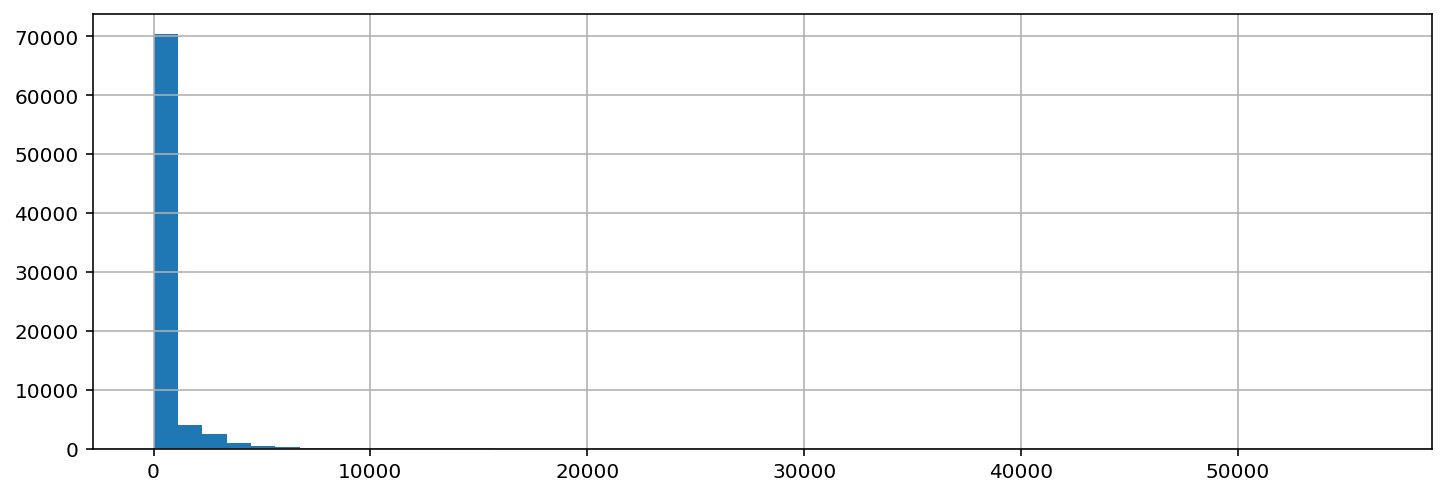

In [18]:
total_seconds.hist(bins=50, figsize=(12, 4));

### Geographical dispersion

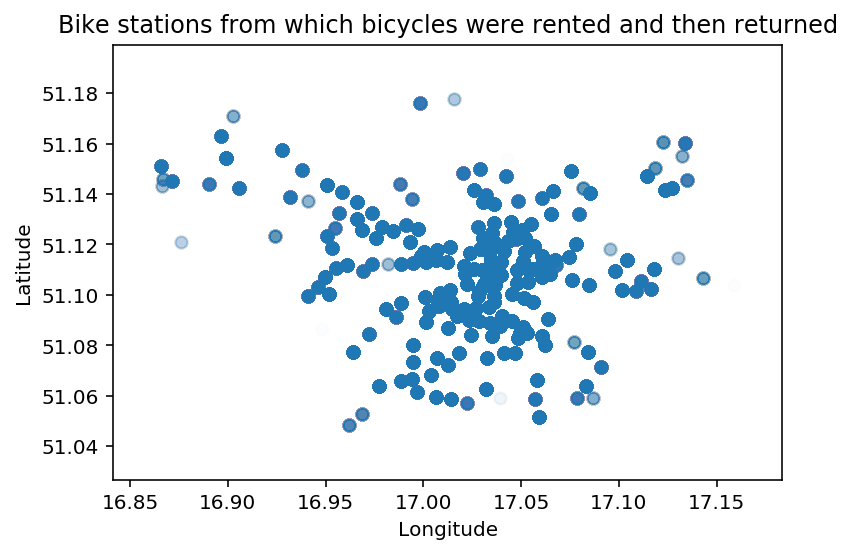

In [19]:
plt.scatter(x=bike_rentals_soft_df.loc[idx, 'Rental station longitude'].values, 
            y=bike_rentals_soft_df.loc[idx, 'Rental station latitude'].values, 
            alpha=0.01)
plt.title('Bike stations from which bicycles were rented and then returned')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();